# Exercise 4: Neural Networks Learning

Hand-written digits recognition with neural networks, focussing on the backpropagation algorithm for gradient computation and learning. The digits are a subset of the [MNIST dataset](http://yann.lecun.com/exdb/mnist/) by Yann LeCun.

Files provided by Coursera, located under `../exercises/ex1-ex8-octave/ex4`

- `ex4.m` - Octave/MATLAB script that steps you through the exercise
- `ex4data1.mat` - Training set of hand-written digits
- `ex4weights.mat` - Initial weights for the neural network
- `submit.m` - Submission script that sends your solutions to our servers
- `displayData.m` - Function to help visualize the dataset
- `fmincg.m` - Function minimization routine (similar to `fminunc`)
- `sigmoid.m` - Sigmoid function
- `computeNumericalGradient.m` - Numerically compute gradients
- `checkNNGradients.m` - Function to help check your gradients
- `debugInitializeWeights.m` - Function for initializing weights
- `predict.m` - Neural network prediction function


Files to complete:

- `sigmoidGradient.m` - Compute the gradient of the sigmoid function
- `randInitializeWeights.m` - Randomly initialize weights
- `nnCostFunction.m` - Neural network cost function
- `predict.m` - Neural network prediction function

Workflow:

- Download latest Octave version of exercise from Coursera
- Complete code in exercise files following `ex4.pdf`
- Whenever an exercise part is finished
  - Check it with `ex4` in Octave terminal
  - Create a submission token on Coursera (exercise submission page, it lasts 30 minutes)
  - Execute `submit` in Octave terminal
  - Introduce email and token
  - Results appear

**Overview of contents:**

0. Setup: `gnuplot`
1. A



## 0. Setup: `gnuplot`

In [1]:
graphics_toolkit ("gnuplot");

In [2]:
%plot -b inline:gnuplot

## 1. Dataset Loading & Visualization

In [5]:
% Load saved matrices from file
load('ex4data1.mat');
% The matrices X and y will now be in your Octave environment

In [6]:
who

Variables visible from the current scope:

X    ans  y



In [9]:
% X: 5000 examples of unrolled 20x20 pixel images containing hand-written digits
% pixels contain grayscale intensities
size(X)

ans =

   5000    400



In [10]:
% y: true label for each example: 1-9, 10:0 (label 10 means digit 0)
size(y)

ans =

   5000      1



In [11]:
% Check min and max values
disp([max(X(1,:)),min(X(1,:))])
disp([max(y(:)),min(y(:))])

   1.047483  -0.057515
   10    1


In [12]:
% Randomly select 100 data points to display
m = size(X, 1);
rand_indices = randperm(m);
num = 10; % num^2 images are visualized in a tiled canvas
sel = X(rand_indices(1:num^2), :);

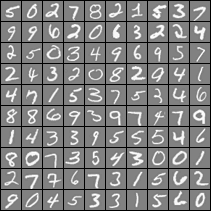

In [13]:
% Function provided in the course
% See how sel is created
% Otherwise, the numer of tiles in the image width can be passed as param (see function)
displayData(sel);

## 2. Model

In [14]:
% Load saved matrices from file
load('ex4weights.mat');
% The matrices Theta1 and Theta2 will now be in your workspace
% Theta1 has size 25 x 401
% Theta2 has size 10 x 26

In [15]:
who

Variables visible from the current scope:

Theta1        X             m             rand_indices  y
Theta2        ans           num           sel



In [18]:
% input = 400 + 1 (bias)
% out = 25
size(Theta1)

ans =

    25   401



In [19]:
% in = 25 + 1 (bias)
% output = 10 (classes)
size(Theta2)

ans =

   10   26



![Neural network model](./neural_network.png)

## 3. Feedforward and Cost Function: `nnCostFunction.m`

### 3.1 Feedforward

In [20]:
function p = infer(Theta1, Theta2, X)
    % Sizes
    m = size(X, 1);
    num_labels = size(Theta2, 1);
    % Initialize return variable: predictions
    p = zeros(size(X, 1), 1);
    % Layer 1
    a1 = [ones(size(X,1),1), X]; % 5000 x 401
    % Layer 1 -> Layer 2
    z2 = a1*Theta1'; % (5000 x 401) x (401 x 25) -> (5000 x 25)
    a2 = sigmoid(z2);
    a2 = [ones(size(a2,1),1), a2]; % bias -> (5000 x 26)
    % Layer 2 -> Layer 3
    z3 = a2*Theta2'; % (5000 x 26) x (26 x 10) -> (5000 x 10)
    a3 = sigmoid(z3);
    % Select class
    [v, p] = max(a3,[],2); % maximum column-value (v) and column-index (p) for each row
end

In [21]:
p = infer(Theta1, Theta2, X);

In [23]:
% Accuracy
matches = y == p;
sum(matches)/length(matches)

ans = 0.9752


### 3.2 Cost Function

$$ J(\theta) = \frac{1}{m} \sum_{i=1}^{m}\sum_{k=1}^{K} \left[ - y_k^{(i)} \log \left( \left( h_\theta \left( x^{(i)} \right) \right)_k \right) - \left( 1 - y_k^{(i)} \right) \log \left( 1 - \left( h_\theta \left( x^{(i)} \right) \right)_k \right) \right]$$

$$y = [y_1, ..., y_k, ..., y_K]^T, \,\, y_k \in \{0,1\}$$

$$h = [h_1, ..., h_k, ..., h_K]^T, \,\, h_k \in [0,1]$$

$$h_k = a^{(L)}_k$$

In [24]:
function g = sigmoid(z)
    g = 1.0 ./ (1.0 + exp(-z));
end

In [26]:
function h = feedForward(Theta1, Theta2, X)
    % Sizes
    m = size(X, 1);
    num_labels = size(Theta2, 1);
    % Initialize return variable: predictions
    h = zeros(size(X, 1), 1);
    % Layer 1
    a1 = [ones(size(X,1),1), X]; % 5000 x 401
    % Layer 1 -> Layer 2
    z2 = a1*Theta1'; % (5000 x 401) x (401 x 25) -> (5000 x 25)
    a2 = sigmoid(z2);
    a2 = [ones(size(a2,1),1), a2]; % bias -> (5000 x 26)
    % Layer 2 -> Layer 3
    z3 = a2*Theta2'; % (5000 x 26) x (26 x 10) -> (5000 x 10)
    h = sigmoid(z3);
end

In [42]:
function [J, grad] = costFunction(nn_params, input_layer_size, hidden_layer_size, num_labels, X, y, lambda)
    % Theta vector: nn_params
    % Parameters are introduced unrolled, so we need to reshape the vector
    % using input_layer_size, hidden_layer_size, num_labels
    
    % 25 x 401: hidden_layer_size x (input_layer_size + 1)
    Theta1 = rreshape(nn_params(1:hidden_layer_size * (input_layer_size + 1)), hidden_layer_size, (input_layer_size + 1));
    % 10 x 26: num_labels x (hidden_layer_size + 1)
    Theta2 = reshape(nn_params((1 + (hidden_layer_size * (input_layer_size + 1))):end), num_labels, (hidden_layer_size + 1));
                 
    % Number of examples
    m = size(X,1);
    
    % Initialize return variables
    J = 0;
    Theta1_grad = zeros(size(Theta1));
    Theta2_grad = zeros(size(Theta2));
    grad = [Theta1_grad(:) ; Theta2_grad(:)];
    
    %%% Feedforward
    % h: 5000 x 10
    h = feedForward(Theta1, Theta2, X);
    
    %%% Part 1: Cost
    
    % Re-arrange y: one-hot encoding
    yh = zeros(size(y, 1), num_labels); % 5000 x 10
    for k = 1:num_labels
        yh(:,k) = y == k;
    end
    
    % Error: for each class, then sum
    e = zeros(1, num_labels);
    for k = 1:num_labels
        e(k) = -yh(:,k)'*log(h(:,k)) - (1 .- yh(:,k))'*log(1 .- h(:,k));
    end
    E = sum(e);
    J = (1.0/m)*E;
    
    %%% Part 2: Regularization of the Cost Function
    % TBD

    %%% Part 3: Backpropagation & Gradient Computation
    % TBD
    
    % Unroll gradients
    grad = [Theta1_grad(:) ; Theta2_grad(:)];

end

### 3.3 Regularized Cost Function

$$ J(\theta) = \frac{1}{m} \sum_{i=1}^{m}\sum_{k=1}^{K} \left[ - y_k^{(i)} \log \left( \left( h_\theta \left( x^{(i)} \right) \right)_k \right) - \left( 1 - y_k^{(i)} \right) \log \left( 1 - \left( h_\theta \left( x^{(i)} \right) \right)_k \right) \right] + \frac{\lambda}{2 m} \left[ \sum_{j=1}^{25} \sum_{k=1}^{400} \left( \Theta_{j,k}^{(1)} \right)^2 + \sum_{j=1}^{10} \sum_{k=1}^{25} \left( \Theta_{j,k}^{(2)} \right)^2 \right] $$

In [48]:
function [J, grad] = costFunction(nn_params, input_layer_size, hidden_layer_size, num_labels, X, y, lambda)
    % Theta vector: nn_params
    % Parameters are introduced unrolled, so we need to reshape the vector
    % using input_layer_size, hidden_layer_size, num_labels
    
    % 25 x 401: hidden_layer_size x (input_layer_size + 1)
    Theta1 = reshape(nn_params(1:hidden_layer_size * (input_layer_size + 1)), hidden_layer_size, (input_layer_size + 1));
    % 10 x 26: num_labels x (hidden_layer_size + 1)
    Theta2 = reshape(nn_params((1 + (hidden_layer_size * (input_layer_size + 1))):end), num_labels, (hidden_layer_size + 1));
                 
    % Number of examples
    m = size(X,1);
    
    % Initialize return variables
    J = 0;
    Theta1_grad = zeros(size(Theta1));
    Theta2_grad = zeros(size(Theta2));
    grad = [Theta1_grad(:) ; Theta2_grad(:)];
    
    %%% Feedforward
    % h: 5000 x 10
    h = zeros(size(X, 1), 1);
    % Layer 1
    a1 = [ones(size(X,1),1), X]; % 5000 x 401
    % Layer 1 -> Layer 2
    z2 = a1*Theta1'; % (5000 x 401) x (401 x 25) -> (5000 x 25)
    a2 = sigmoid(z2);
    a2 = [ones(size(a2,1),1), a2]; % bias -> (5000 x 26)
    % Layer 2 -> Layer 3
    z3 = a2*Theta2'; % (5000 x 26) x (26 x 10) -> (5000 x 10)
    h = sigmoid(z3);
    
    %%% Part 1: Cost
    
    % Re-arrange y: one-hot encoding
    yh = zeros(size(y, 1), num_labels); % 5000 x 10
    for k = 1:num_labels
        yh(:,k) = y == k;
    end
    
    % Error: for each class, then sum
    e = zeros(1, num_labels);
    for k = 1:num_labels
        e(k) = -yh(:,k)'*log(h(:,k)) - (1 .- yh(:,k))'*log(1 .- h(:,k));
    end
    E = sum(e);
    J = (1.0/m)*E;
    
    %%% Part 2: Regularization of the Cost Function
    t1 = Theta1(:,2:end)(:); % remove bias weight and unroll to column vector
    t2 = Theta2(:,2:end)(:); % remove bias weight and unroll to column vector
    R = (0.5*lambda/m) * (t1'*t1 + t2'*t2);
    J = J + R;
    
    %%% Part 3: Backpropagation & Gradient Computation
    % TBD

    % Unroll gradients
    grad = [Theta1_grad(:) ; Theta2_grad(:)];

end